In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
%run ./Generate_Network_Topology.ipynb

In [3]:
%run ./Generating_CRs.ipynb 

In [4]:
# %run ./Priority_Queue.ipynb # No need, the method has been incorporated in the class CR

In [5]:
%run ./Links.ipynb

In [6]:
# Define the subdirectory name
subdirectory = "Figures"

# Check if the subdirectory exists
if not os.path.exists(subdirectory):
    os.makedirs(subdirectory)


In [7]:
edges = [ (1, 2, 1100),  #Edge between Node 0 and Node 1
             (2, 3, 1600), #Intermediate Edge between Node 1 and Node 2
             (1, 3, 600), # Edge between Node 0 and Node 2
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (1, 4, 1000),  # Edge between Node 0 and Node 3
             (4, 5, 600), # Edge between Node 3 and Node 4
             (5, 7, 800), # Intermediate edge between Node 4 and Node 6
             (7, 8, 700), # Intermediate edge between Node 6 and Node 7
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (4, 9, 1500), # Edge Betweeen Node 3 and Node 8
             (9, 12, 800), # Edge Betweeen Node 8 and Node 11
             (8, 10, 700), # Edge Betweeen Node 7 and Node 9
             (10, 12, 500), # Edge Betweeen Node 9 and Node 11
             (9, 14, 800), # Edge Betweeen Node 8 and Node 13
             (10, 14, 500), # Edge Betweeen Node 9 and Node 13
             (12, 13, 300), # Edge Betweeen Node 11 and Node 12
             (13, 14, 300), # Edge Betweeen Node 12 and Node 13
             (3, 6, 1000), # Edge Betweeen Node 2 and Node 5
             (6, 5, 1100), # Edge Betweeen Node 5 and Node 4
             (6, 13, 2000), # Edge Betweeen Node 5 and Node 12
             (6, 11, 1200), # Edge Betweeen Node 5 and Node 10
             (10, 11, 900) # Edge Betweeen Node 9 and Node 10]
        ]

# Step 1:
Initialize the network status and parameters, and generate a set of CR, i.e., X CRs.
## Step 2(a) : 
For each CR, we set a SL (incorporated in Step 1)

Number of Nodes:  14
Number of Links : 21


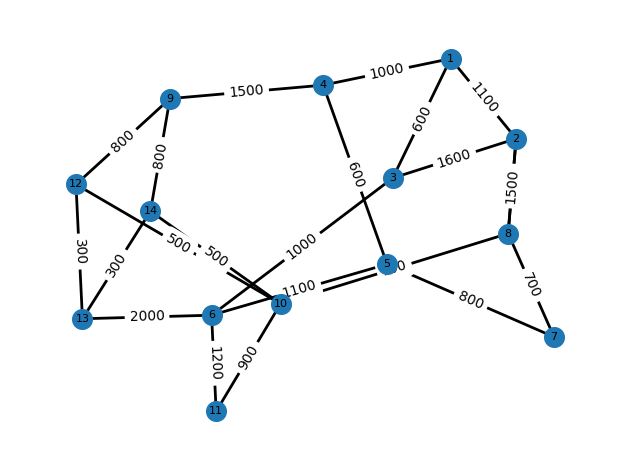

In [8]:
g_nsfnet = create_topology(edges) # Creates the nsfnet topology
links, indices, unordered_indices = Links.initialize_links(edges) # Initializes the links structure with weights

numNodes = len(g_nsfnet)
X = 600    # Just an example
CRs = CR.generate_crs(X) # Generating X Crs. 

In [9]:
# Print the array of CR instances
print("CR info : ")
for cr in CRs:
    cr.display_info()

# Print link info
'''
for link in links[indices]:    # Will display double the number of actual edges, due to ordered pair
   link.display_info()
'''
print("Link info : ")
Links.display_all_links()

CR info : 
CR: Index : 0, Source Node =8, Destination Node=13, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 1, Source Node =14, Destination Node=3, Security Level=low, status=initialized, allocated resources = [None, None]
CR: Index : 2, Source Node =3, Destination Node=9, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 3, Source Node =13, Destination Node=5, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 4, Source Node =12, Destination Node=8, Security Level=low, status=initialized, allocated resources = [None, None]
CR: Index : 5, Source Node =8, Destination Node=2, Security Level=low, status=initialized, allocated resources = [None, None]
CR: Index : 6, Source Node =13, Destination Node=2, Security Level=medium, status=initialized, allocated resources = [None, None]
CR: Index : 7, Source Node =4, Destination Node=6, Security Level=medium, status=initialized, al

# Step 2(b) :
use the K-SP algorithm to obtain the K candidate transmission paths. 
The path with the shortest distance is selected as the transmission path of QSC and PIC.

In [10]:
cr = CRs[0]    # Taking only 1 cr for now. Later it can be converted to for loop to loop over all CRs

k_sp = cr.k_sp(g_nsfnet, 10)    # Taking k = 10
candidate_path = k_sp[0][0]    # Path with the shortest distance becomes the transmission path

In [11]:
# Displaying all the K shortest paths along with their path costs
for i, (path, cost) in enumerate(k_sp):
    print(f"Path {i + 1}: {path}, Cost: {cost}")

# Displaying the candidate path
print(f"Candidate path : {candidate_path}")

Path 1: [8, 10, 12, 13], Cost: 1500
Path 2: [8, 10, 14, 13], Cost: 1500
Path 3: [8, 10, 12, 9, 14, 13], Cost: 3100
Path 4: [8, 10, 14, 9, 12, 13], Cost: 3100
Path 5: [8, 7, 5, 6, 13], Cost: 4600
Path 6: [8, 7, 5, 4, 9, 12, 13], Cost: 4700
Path 7: [8, 7, 5, 4, 9, 14, 13], Cost: 4700
Path 8: [8, 10, 11, 6, 13], Cost: 4800
Path 9: [8, 7, 5, 6, 11, 10, 12, 13], Cost: 5500
Path 10: [8, 7, 5, 6, 11, 10, 14, 13], Cost: 5500
Candidate path : [8, 10, 12, 13]


In [12]:
# Allocate to TDC and QSC

In [13]:
# if no time slot is available, we move on to the next candidate path
cr = CRs[0]
attempt = Links.FF(candidate_path, cr)
print(f"CR status : {cr.status}, on path : {candidate_path}, allocated resources : {cr.allocated_resources}")

np.count_nonzero(available_ts) : 8
qscs : 0
The updated q1 resources for (8, 10) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (12, 13) are : [False  True  True  True  True  True  True  True]
allocated ts_0 successfully to CR 0
CR status : allocated, on path : [8, 10, 12, 13], allocated resources : [1, 0]


# Step3：
If a CR is successfully allocated to TDC & QSC, turn to Step4; otherwise, this CR blocks. If an event is waiting for a CR(X=0), turn to Step9


In [14]:
if attempt:
    print(f"CR status : {cr.status}, on path : {candidate_path}, allocated resources : {cr.allocated_resources}" )
else :
    print("CR couldn't be successfully allocated on path :", candidate_path)

CR status : allocated, on path : [8, 10, 12, 13], allocated resources : [1, 0]


In [15]:
# Displaying the resources after allocation
path = candidate_path
for s, d in zip(path, path[1:]):
    links[s, d].display_info()
    #links[s, d].wl_info()

Link (8, 10) : lambda_tdc_count = 46, lambda_q1_count = 7, lambda_q2_count = 10, lambda_q3_count = 12, occupied_ts = [1 1 0 0], available_ts = [29  7 10 12]
Link (10, 12) : lambda_tdc_count = 46, lambda_q1_count = 7, lambda_q2_count = 10, lambda_q3_count = 12, occupied_ts = [1 1 0 0], available_ts = [29  7 10 12]
Link (12, 13) : lambda_tdc_count = 46, lambda_q1_count = 7, lambda_q2_count = 10, lambda_q3_count = 12, occupied_ts = [1 1 0 0], available_ts = [29  7 10 12]


# Step 4 :
Create three queues with different priorities in PQ={𝑪𝑹1, 𝑪𝑹0, 𝑪𝑹−1}, i.e., 𝑪𝑹1, 𝑪𝑹0 and 𝑪𝑹−1. Each CR has a specific SL, sl. 
Place the CR of the corresponding SL in the corresponding priority. If this CR belongs to the high-level priority queue, 𝑪𝑹1, then turn to Step 5. 
If this CR belongs to mid-level priority queue 𝑪𝑹0 or low-level priority queue, 𝑪𝑹−1, turn to Step 6.


In [16]:
PQ = CR.create_priority_queue()

In [17]:
CR.display_all(PQ)

CR: Index : 0, Source Node =8, Destination Node=13, Security Level=high, status=allocated, allocated resources = [1, 0]
CR: Index : 2, Source Node =3, Destination Node=9, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 3, Source Node =13, Destination Node=5, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 8, Source Node =10, Destination Node=4, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 9, Source Node =12, Destination Node=9, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 10, Source Node =8, Destination Node=5, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 11, Source Node =12, Destination Node=8, Security Level=high, status=initialized, allocated resources = [None, None]
CR: Index : 14, Source Node =6, Destination Node=10, Security Level=high, status=initialized, allocated resource

In [18]:
'''
Let's assume we have 800 CRs, all dealt with.
Manually calculating TUR : calculate total number of used slots. divided by total slots(already known)
2 approaches : 
CR approach : for every allocated CR, we take the number of links in its path = len(path)-1. This will be the occupied slots by a particular cr. Can calculate SRCR and NSP as well
Links approach : count the nonzero elements in each link(unordered_indices) band.
'''

"\nLet's assume we have 800 CRs, all dealt with.\nManually calculating TUR : calculate total number of used slots. divided by total slots(already known)\n2 approaches : \nCR approach : for every allocated CR, we take the number of links in its path = len(path)-1. This will be the occupied slots by a particular cr. Can calculate SRCR and NSP as well\nLinks approach : count the nonzero elements in each link(unordered_indices) band.\n"

In [19]:
CR.sfw[PQ[0].sl]

5

In [20]:
#X = 100
# Parameters used later
k = 10
   
# Initializes the links structure with weights
(links, indices, unordered_indices) = Links.initialize_links(edges) 

# Generating X Crs
CRs = CR.generate_crs(X) 

########################################################################
    
# Creating the priority Queue
PQ = CR.create_priority_queue()

for cr in PQ:  
            
    k_sp = cr.k_sp(g_nsfnet, k)    # Taking k = 10. Gives us [path][weight]
    # Finding the path to be followed
    for i in range(k):    # Using the next k-sp in case the CR couldn't be allocated to the previous one
        candidate_path = k_sp[i][0]    # Path with the lowest weight so far becomes the transmission path
        print(f"\nAttempting allocation of CR {cr.index} on path : {candidate_path}")
        
        # Attempting to allocate resources
        success = Links.FF(candidate_path, cr)
        print(f"CR {cr.index} status : {cr.status}, on path :", candidate_path)
        # Checking if the path was allocated or not
        if success:
            break  

        #X = X-1


Attempting allocation of CR 0 on path : [1, 4]
np.count_nonzero(available_ts) : 8
qscs : 0
The updated q1 resources for (1, 4) are : [False  True  True  True  True  True  True  True]
allocated ts_0 successfully to CR 0
CR 0 status : allocated, on path : [1, 4]

Attempting allocation of CR 1 on path : [3, 6, 11]
np.count_nonzero(available_ts) : 8
qscs : 0
The updated q1 resources for (3, 6) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (6, 11) are : [False  True  True  True  True  True  True  True]
allocated ts_0 successfully to CR 1
CR 1 status : allocated, on path : [3, 6, 11]

Attempting allocation of CR 2 on path : [13, 12, 10, 8, 7]
np.count_nonzero(available_ts) : 8
qscs : 0
The updated q1 resources for (12, 13) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (8, 10) are : [False  True  True  True  True  True  Tr

In [21]:
print(len(links[indices]))

42


In [22]:
# CR approach(cra) : for tur, nsp and srcr

#X = 800
"""
cra_tur = np.zeros(j_range).astype(int)
cra_srcr = np.zeros(j_range).astype(int)
cra_nsp = np.zeros(j_range).astype(int)
"""
cra_nsp = 0
cra_tur = 0
cra_srcr = 0
for i, cr in enumerate(PQ):    # PQ_all[1] is for crs with high priority
    if cr.status == 'allocated':
        cra_tur += (len(cr.path) - 1)
        cra_srcr += 1
        cra_nsp += CR.sfw[cr.sl]

cra_tur /= Links.total_ts
cra_srcr /= len(CRs)

In [39]:
# Links approach(la): Only for tur

#X = 800
la_tur1 = 0
la_tur = np.zeros(4).astype('int')
for nodes in Links.unordered_indices:
    la_tur1 += Links.links[nodes].available_ts[0]
    la_tur += Links.links[nodes].available_ts

la_tur /= int(Links.total_ts)
la_tur /= int(Links.total_ts)

UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [24]:
print(cra_tur, cra_nsp, cra_srcr)

19.033333333333335 1084 0.4633333333333333


In [25]:
print(la_tur, la_tur1)

[61 17 15 29] 61


# Combined

## QKRA SSL

Network topology can be initialized once at the start. Only Links need to be initialized everytime

Number of Nodes:  14
Number of Links : 21


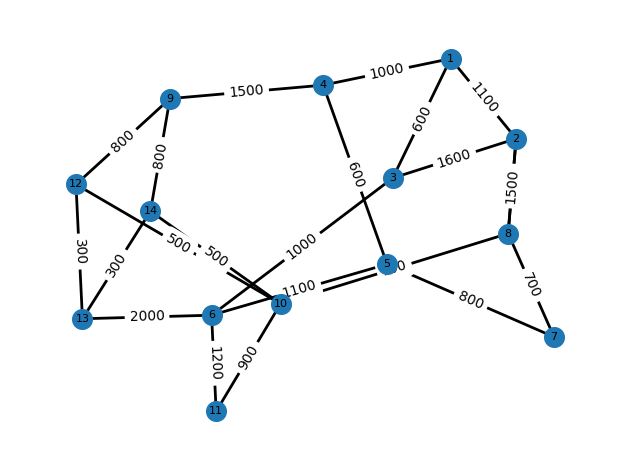


Attempting allocation of CR 1 on path : [7, 8, 10, 12, 13]
np.count_nonzero(available_ts) : 8
qscs : 0
The updated q1 resources for (7, 8) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (8, 10) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (12, 13) are : [False  True  True  True  True  True  True  True]
allocated ts_0 successfully to CR 1
CR 1 status : allocated, on path : [7, 8, 10, 12, 13]

Attempting allocation of CR 2 on path : [13, 12, 10, 8, 7]
np.count_nonzero(available_ts) : 7
qscs : 1
The updated q1 resources for (12, 13) are : [False False  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False False  True  True  True  True  True  True]
The updated q1 resources for (8, 10) are : [False False  True  True  True  True  True  True]
The updated q1 resources for (7, 8) are : [False

In [26]:
#%%capture 

# Creates the nsfnet topology
g_nsfnet = create_topology(edges) 
numNodes = len(g_nsfnet)
#X = 100    
# Let's test for X = 10, and j < 6. Average over 10 iterations.
num_iter = 1
j_range = 1
srcr = np.zeros([num_iter, j_range]).astype(int)
tur = np.zeros([num_iter, j_range]).astype(int)
nsp = np.zeros([num_iter, j_range]).astype(int)
x = np.zeros([num_iter, j_range]).astype(int)


for z in range(num_iter):    # Loop to average over the same list of X
    #factor = int(input("Input the multiplication factor"))
    factor = 10

    #X = int(input("Input the number of CRs to be generates"))
    #X = 10*factor
    
    j = 0    
    %run ./QKRA.ipynb

In [27]:
avg_srcr = np.zeros(j_range)
avg_tur = np.zeros(j_range)
avg_nsp = np.zeros(j_range)
avg_x = np.zeros(j_range)

for i in range((j_range)):
    for j in range(num_iter):
        avg_srcr[i] += srcr[j, i] 
        avg_tur[i] += tur[j, i] 
        avg_nsp[i] += nsp[j, i] 
        avg_x[i] += x[j, i] 

avg_srcr /= num_iter
avg_tur /= num_iter 
avg_nsp /= num_iter
avg_x /= num_iter 

In [28]:
print(avg_srcr, avg_tur, avg_nsp, avg_x)

[0.] [1.] [1034.] [600.]


In [29]:
print(len(srcr), len(tur), len(nsp), len(x))

1 1 1 1


# Plotting the data

**SRCR and TUR**

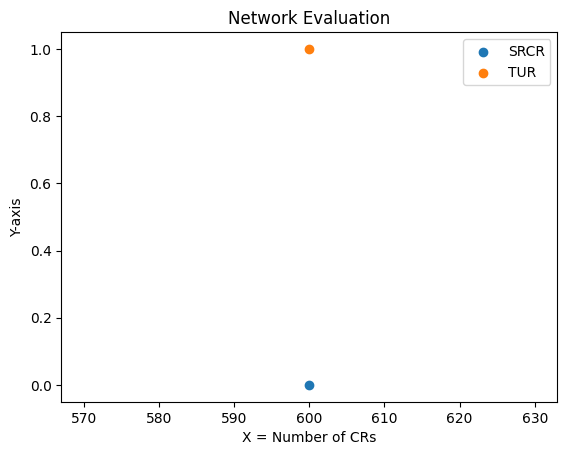

SRCR and TUR for X - [600] to [600].jpg


<Figure size 640x480 with 0 Axes>

In [30]:
plt.scatter(x, srcr, label='SRCR')

y = [item[0] for item in tur]
plt.scatter(x, y, label='TUR')

plt.xlabel('X = Number of CRs')
plt.ylabel('Y-axis')
plt.title('Network Evaluation')
plt.legend()
plt.show()

filename = "SRCR and TUR for X - " + str(x[0]) + " to " + str(x[-1]) + ".jpg"
print(filename)

# Combine the subdirectory and filename to create the full path
full_path = os.path.join(subdirectory, filename)

plt.savefig(full_path, dpi=300, bbox_inches='tight')


**NSP**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


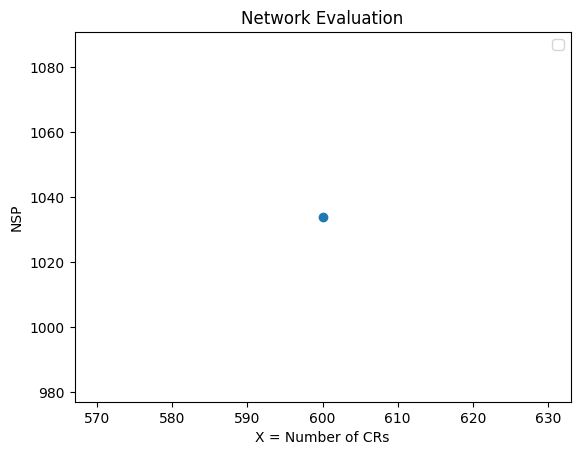

NSP for X - [600] to [600].jpeg


<Figure size 640x480 with 0 Axes>

In [31]:
y = [item[0] for item in nsp]
plt.scatter(x, y)

plt.xlabel('X = Number of CRs')
plt.ylabel('NSP')
plt.title('Network Evaluation')
plt.legend()
plt.show()

filename = "NSP for X - " + str(x[0]) + " to " + str(x[-1]) + ".jpeg"
print(filename)

# Combine the subdirectory and filename to create the full path
full_path = os.path.join(subdirectory, filename)

plt.savefig(full_path, dpi=300, bbox_inches='tight')


In [32]:
for i in range(j_range):
    print(f"\nfor X = {5*(2 + i)*factor}")
    print(f"\nSRCR {i} : {srcr[i]}")
    print(f"\nNSP {i} : {nsp[i]}")
    print(f"\nTUR {i} : {tur[i]}")


for X = 100

SRCR 0 : [0]

NSP 0 : [1034]

TUR 0 : [1]
